## 6.1 자바스크립트 배열의 map() 함수
```js
const IterationSample = () => {
    return (
        <ul>
            <li>눈사람</li>
            <li>얼음</li>
            <li>눈</li>
            <li>바람</li>
        </ul>
    )
};

export default IterationSample;
```
- 코드에서 li 형태가 반복
- 코드가 복잡해지면 반복되는 코드양은 늘어날 것이며, 파일 용량도 증가
- 따라서 반복적인 내용을 효율적으로 보여 주고 관리하는 방법이 map을 사용
- map 함수는 기존 배열로 새로운 배열을 만드는 역할을 함

- map 문법
    - arr.map(callback, [thisArg])
    - callback : 새로운 배열의 요소를 생성하는 함수로 currentValu, index, array를 파라미터로 갖는다
    - thisArg(선택항목) : callback 함수 내부에서 사용할 this 레퍼런스
- 예제
    - map 함수를 사용하여 배열 [1,2,3,4,5]의 각 요소를 제곱해서 배열 생성
        ```js
        var number = [1, 2, 3, 4, 5]
        var processed = number.map(function(num){
            return num*num
        })
        ```

## 6.2 데이터 배열을 컴포넌트 배열로 변환하기
- 위 코드를 map을 사용해 수정
```js
const IterationSample = () => {
    const names = ['눈사람', '얼음', '눈', '바람'];
    const nameList = names.map(name => <li>{name}</li>);
    return <ul>{nameList}</ul>;
};
  
export default IterationSample;
```
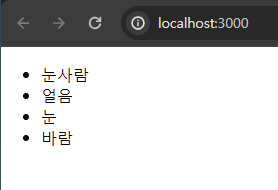

- key가 없다는 경고 메시지 발생

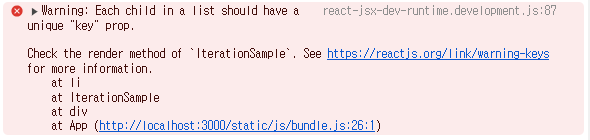

## 6.3 key
- key는 컴포넌트 배열을 렌더링했을 때 어떤 원소에 변동이 있었는지 알아내려고 사용
- key가 없을 때는 Virtual DOM을 리스트를 순차적으로 비교하면서 변화 감지, key가 있다면 빠르게 알 수 있음
- key 설정
    - 데이터가 가진 고윳값을 key 값으로 설정해야한다.
    - index를 key로 사용하면 배열이 변경될 때 효율적이지 않다.
```js
const IterationSample = () => {
    const names = ['눈사람', '얼음', '눈', '바람'];
    const nameList = names.map((name, index) => <li key={index}>{name}</li>);
    return <ul>{nameList}</ul>;
};
  
export default IterationSample;
```


## 6.4 응용
- key 값을 name.id로 지정
    ```js
    import { useState } from "react";

    const IterationSample = () => {
        const [names, setNames] = useState([
            { id: 1, text: '눈사람' },
            { id: 2, text: '얼음' },
            { id: 3, text: '눈'},
            { id: 4, text: '바람'}
        ])
        
        const [inputText, setInputText] = useState('')
        const [nextId, setNextId] = useState(5)

        const namesList = names.map(name => <li key={name.id}>{name.text}</li>)
        return <ul>{namesList}</ul>;
    };
    
    export default IterationSample;
    ```

- 데이터 추가 구현
    - ul 태그 상단에 input과 button을 렌더링, 버튼을 클릭했을 때 호출할 onClick 함수를 선언해 이벤트 설정
    - onClick 함수에서 concat을 사용해 새로운 항목을 추가한 배열을 만들고, setNames를 통해 업데이트
        ```js
        import { useState } from "react";

        const IterationSample = () => {
            const [names, setNames] = useState([
                { id: 1, text: '눈사람' },
                { id: 2, text: '얼음' },
                { id: 3, text: '눈'},
                { id: 4, text: '바람'}
            ])
            
            const [inputText, setInputText] = useState('')
            const [nextId, setNextId] = useState(5)

            const onChange = e => setInputText(e.target.value)
            const onClick = () => {
                const nextNames = names.concat({
                    id: nextId,
                    text:inputText
                })
                setNextId(nextId + 1)
                setNames(nextNames)
                setInputText('')
            }

            const namesList = names.map(name => <li key={name.id}>{name.text}</li>)
            return (
                <>
                    <input value={inputText} onChange={onChange} />
                    <button onClick={onClick}>추가</button>
                    <ul>{namesList}</ul>
                </>
            )
        };
        
        export default IterationSample;
        ```
        
- 데이터 제거 구현
    - 각 항목을 더블클릭했을 때 화면에서 사라지는 기능 구현
    - filter 함수 사용
        ```js
        import { useState } from "react";

        const IterationSample = () => {
            const [names, setNames] = useState([
                { id: 1, text: '눈사람' },
                { id: 2, text: '얼음' },
                { id: 3, text: '눈'},
                { id: 4, text: '바람'}
            ])
            
            const [inputText, setInputText] = useState('')
            // 새로운 항목을 추가할 때 사용할 id
            const [nextId, setNextId] = useState(5)

            const onChange = e => setInputText(e.target.value)
            const onClick = () => {
                const nextNames = names.concat({
                    //nextId 값을 id로 설정
                    id: nextId,
                    text:inputText
                })
                // nextId 값에 1 더해즘
                setNextId(nextId + 1)
                // names 값 업데이트
                setNames(nextNames)
                // inputText 비움
                setInputText('')
            }
            const onRemove = id => {
                const nextNames = names.filter(name => name.id !== id)
                setNames(nextNames)
            }

            const namesList = names.map(name => (
                <li key={name.id} onDoubleClick={() => onRemove(name.id)}>
                    {name.text}
                </li>
            ))
            return (
                <>
                    <input value={inputText} onChange={onChange} />
                    <button onClick={onClick}>추가</button>
                    <ul>{namesList}</ul>
                </>
            )
        };
        
        export default IterationSample;
        ```

## 6.5 정리
- 반복되는 데이터를 렌더링 하는 방법 학습
- 유동적인 배열을 다룸
- key 값 설정에 항상 주의!!
- key 값은 언제나 유일해야 함
- key 값이 중복된다면 렌더링 과정에서 오류 발생
- 배열을 변형할 때는 배열에 직접 접근해 수정하지 않고, concat, filter등의 내장 함수를 사용하여 새로운 배열 생성 후 새로운 상태로 설정해야한다.